In [8]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

st = StandardScaler()
mm = MinMaxScaler()

PATH = 'C:/Users/skh01/Downloads/Expanded_data_with_more_features.csv/Expanded_data_with_more_features.csv'

In [9]:
study = pd.read_csv(PATH)
stu = study.copy()

In [ ]:
stu.isna().sum()

#NaN데이터 처리

In [11]:
stu.TransportMeans=stu.TransportMeans.fillna('walk')
stu.TestPrep = stu.TestPrep.fillna('none')
stu.WklyStudyHours = stu.WklyStudyHours.fillna('0')
stu['IsFirstChild'] = stu['IsFirstChild'].fillna('no')
stu.PracticeSport = stu.PracticeSport.fillna('no')
stu.NrSiblings = stu.NrSiblings.fillna(0.0)

stu.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep                  0
ParentMaritalStatus    1190
PracticeSport             0
IsFirstChild              0
NrSiblings                0
TransportMeans            0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [12]:
stu.dropna(inplace=True)

In [13]:
stu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26032 entries, 1 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           26032 non-null  int64  
 1   Gender               26032 non-null  object 
 2   EthnicGroup          26032 non-null  object 
 3   ParentEduc           26032 non-null  object 
 4   LunchType            26032 non-null  object 
 5   TestPrep             26032 non-null  object 
 6   ParentMaritalStatus  26032 non-null  object 
 7   PracticeSport        26032 non-null  object 
 8   IsFirstChild         26032 non-null  object 
 9   NrSiblings           26032 non-null  float64
 10  TransportMeans       26032 non-null  object 
 11  WklyStudyHours       26032 non-null  object 
 12  MathScore            26032 non-null  int64  
 13  ReadingScore         26032 non-null  int64  
 14  WritingScore         26032 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [10]:
stu.shape

(26032, 15)

In [14]:
stu.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [15]:
stu = stu.rename(columns={'Unnamed: 0':'stu_id'})

In [16]:
stu['TotalMeans'] = (stu['MathScore'].astype('int')+stu['ReadingScore'].astype('int')+stu['WritingScore'].astype('int'))/3

In [17]:
stu.head()

,stu_id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalMeans
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,walk,5 - 10,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,walk,5 - 10,45,56,42,47.666667
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,78.666667


In [170]:
stu.shape

(26032, 24)

In [15]:
stu.columns

Index(['stu_id', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore', 'TotalMeans'],
      dtype='object')

In [20]:
stu_cate = stu[['Gender','EthnicGroup', 'LunchType', 'ParentEduc',
       'TestPrep','ParentMaritalStatus', 'PracticeSport', 'IsFirstChild','TransportMeans','WklyStudyHours']]

#K-modes 클러스터링

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화 
# stu_scaled = st.fit_transform(stu_cate)
# pd.DataFrame(stu_scaled)

In [22]:
from kmodes.kmodes import KModes

In [23]:
#Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,10)):
    kmode=KModes(n_clusters=num_clusters, init = 'Cao', n_init=1, verbose=1)
    kmode.fit_predict(stu_cate)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 127044.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 115986.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 110322.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 104635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 100796.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 98025.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 96077.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, itera

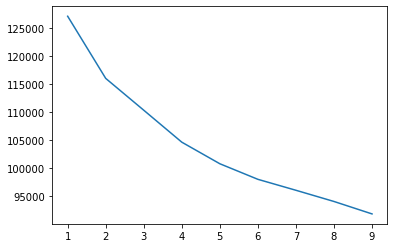

In [24]:
import matplotlib.pyplot as plt

y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [ ]:
# Choosing K=2

In [25]:
km_cao = KModes(n_clusters=2, init = 'Cao', n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(stu_cate)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 115986.0


In [26]:
fitClusters_cao

array([0, 0, 1, ..., 1, 0, 0], dtype=uint16)

In [ ]:
#Combining the predicted clusters with the original DF

In [27]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
# combinedDf = pd.concat([stu_cate, clustersDf], axis = 1).reset_index()


In [28]:
stu['cluster'] = clustersDf.cluster_predicted

In [29]:
stu.head()

,stu_id,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalMeans,cluster
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,walk,5 - 10,69,90,88,82.333333,0.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333,1.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,walk,5 - 10,45,56,42,47.666667,0.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333,0.0
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,78.666667,0.0


In [34]:
clustersDf

,cluster_predicted
0,0
1,0
2,0
3,0
4,0
...,...
26027,0
26028,0
26029,1
26030,0


In [30]:
cluster_0 = stu[stu['cluster']==0]
cluster_1 = stu[stu['cluster']==1]

In [76]:
stu.cluster.value_counts()

0.0    17733
1.0     4404
Name: cluster, dtype: int64

In [74]:
cluster_0.describe()

,stu_id,NrSiblings,MathScore,ReadingScore,WritingScore,TotalMeans,cluster
count,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.0
mean,496.819489,2.037952,66.685896,69.488693,68.553431,68.242674,0.0
std,287.599179,1.507135,15.365897,14.747061,15.460279,14.459314,0.0
min,0.000000,0.000000,0.000000,11.000000,6.000000,9.000000,0.0
25%,247.000000,1.000000,56.000000,59.000000,58.000000,58.333333,0.0
50%,496.000000,2.000000,67.000000,70.000000,69.000000,68.666667,0.0
75%,746.000000,3.000000,78.000000,80.000000,79.000000,78.666667,0.0
max,999.000000,7.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [75]:
cluster_1.describe()

,stu_id,NrSiblings,MathScore,ReadingScore,WritingScore,TotalMeans,cluster
count,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.0
mean,492.907357,2.053815,66.243869,69.112625,68.083560,67.813351,1.0
std,286.498321,1.504497,15.551166,14.779061,15.538113,14.548363,0.0
min,0.000000,0.000000,10.000000,12.000000,9.000000,10.333333,1.0
25%,254.000000,1.000000,55.000000,59.000000,57.000000,57.666667,1.0
50%,490.500000,2.000000,66.000000,69.000000,68.000000,68.000000,1.0
75%,733.000000,3.000000,77.000000,80.000000,79.000000,78.333333,1.0
max,999.000000,7.000000,100.000000,100.000000,100.000000,100.000000,1.0


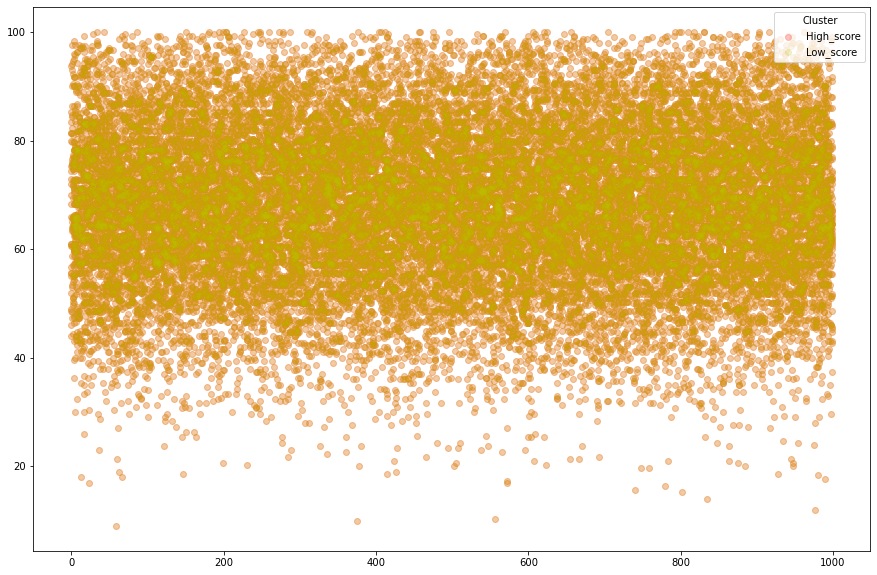

In [77]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(stu.stu_id, stu.TotalMeans, color='r', alpha=0.2, label = 'High_score')
ax.scatter(stu.stu_id, stu.TotalMeans, color='y', alpha=0.2, label = 'Low_score')
ax.legend(title='Cluster', loc='upper right')
plt.show()

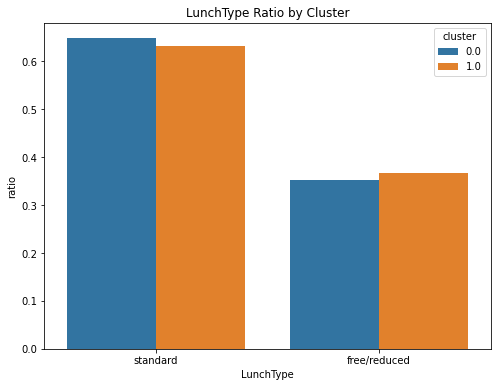

In [32]:
# 클러스터별 LunchType 값 비율을 계산
cluster_lunch_ratio = stu.groupby(['cluster', 'LunchType']).size().reset_index(name='count')
cluster_ratio = cluster_lunch_ratio.groupby('cluster')['count'].transform(lambda x: x / x.sum())
cluster_lunch_ratio['ratio'] = cluster_ratio

# plot 생성
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=cluster_lunch_ratio, x='LunchType', y='ratio', hue='cluster', order=['standard', 'free/reduced'])
ax.set(title='LunchType Ratio by Cluster')
plt.show()

In [79]:
stu.PracticeSport.value_counts()


sometimes    12907
regularly     9214
never         3398
no             513
Name: PracticeSport, dtype: int64

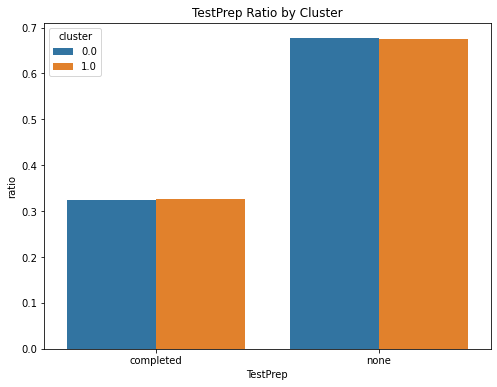

In [36]:
#Test Prep
cluster_TestPrep_ratio = stu.groupby(['cluster', 'TestPrep']).size().reset_index(name='count')
cluster_ratio = cluster_TestPrep_ratio.groupby('cluster')['count'].transform(lambda x: x / x.sum())
cluster_TestPrep_ratio['ratio'] = cluster_ratio

# plot 생성
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=cluster_TestPrep_ratio, x='TestPrep', y='ratio', hue='cluster', order=['completed', 'none'])
ax.set(title='TestPrep Ratio by Cluster')
plt.show()

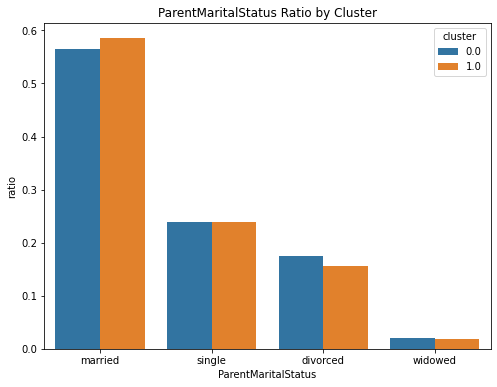

In [39]:
#ParentMaritalStatus
cluster_ParentMaritalStatus_ratio = stu.groupby(['cluster', 'ParentMaritalStatus']).size().reset_index(name='count')
cluster_ratio = cluster_ParentMaritalStatus_ratio.groupby('cluster')['count'].transform(lambda x: x / x.sum())
cluster_ParentMaritalStatus_ratio['ratio'] = cluster_ratio

# plot 생성
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=cluster_ParentMaritalStatus_ratio, x='ParentMaritalStatus', y='ratio', hue='cluster', order=['married','single','divorced','widowed'])
ax.set(title='ParentMaritalStatus Ratio by Cluster')
plt.show()

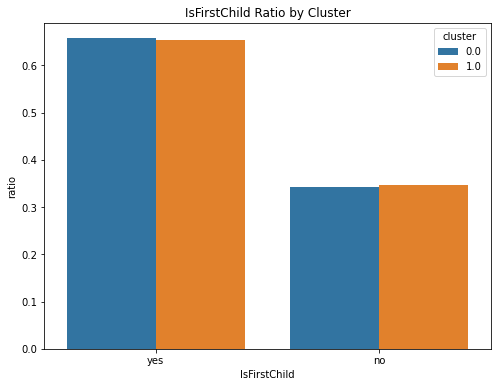

In [41]:
#IsFirstChild
cluster_IsFirstChild_ratio = stu.groupby(['cluster', 'IsFirstChild']).size().reset_index(name='count')
cluster_ratio = cluster_IsFirstChild_ratio.groupby('cluster')['count'].transform(lambda x: x / x.sum())
cluster_IsFirstChild_ratio['ratio'] = cluster_ratio

# plot 생성
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=cluster_IsFirstChild_ratio, x='IsFirstChild', y='ratio', hue='cluster', order=['yes','no'])
ax.set(title='IsFirstChild Ratio by Cluster')
plt.show()

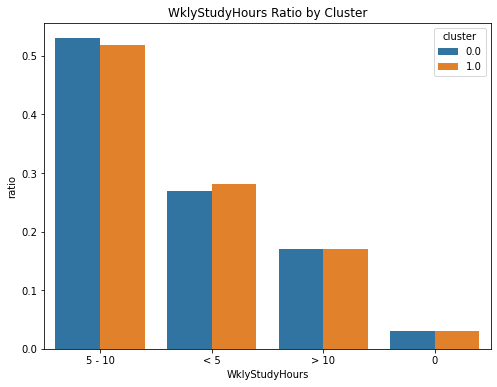

In [44]:
#WklyStudyHours
cluster_WklyStudyHours_ratio = stu.groupby(['cluster', 'WklyStudyHours']).size().reset_index(name='count')
cluster_ratio = cluster_WklyStudyHours_ratio.groupby('cluster')['count'].transform(lambda x: x / x.sum())
cluster_WklyStudyHours_ratio['ratio'] = cluster_ratio

# plot 생성
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=cluster_WklyStudyHours_ratio, x='WklyStudyHours', y='ratio', hue='cluster', order=['5 - 10','< 5','> 10','0'])
ax.set(title='WklyStudyHours Ratio by Cluster')
plt.show()

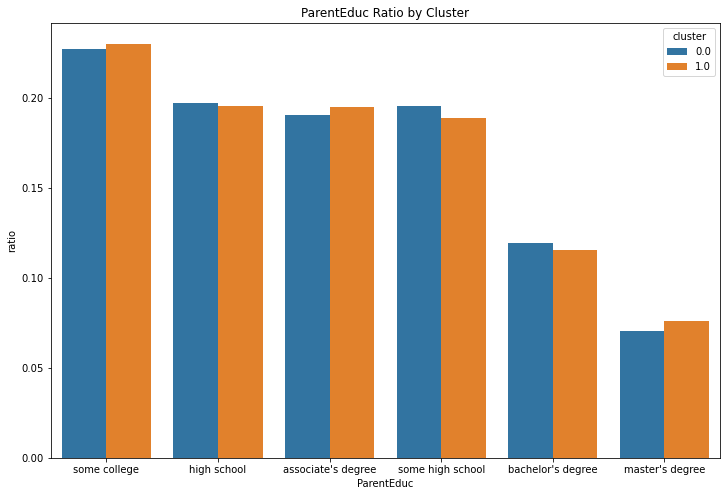

In [48]:
#ParentEduc
cluster_ParentEduc_ratio = stu.groupby(['cluster', 'ParentEduc']).size().reset_index(name='count')
cluster_ratio = cluster_ParentEduc_ratio.groupby('cluster')['count'].transform(lambda x: x / x.sum())
cluster_ParentEduc_ratio['ratio'] = cluster_ratio

# plot 생성
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=cluster_ParentEduc_ratio, x='ParentEduc', y='ratio', hue='cluster', order=['some college','high school',"associate's degree",'some high school',"bachelor's degree","master's degree"])
ax.set(title='ParentEduc Ratio by Cluster')
plt.show()

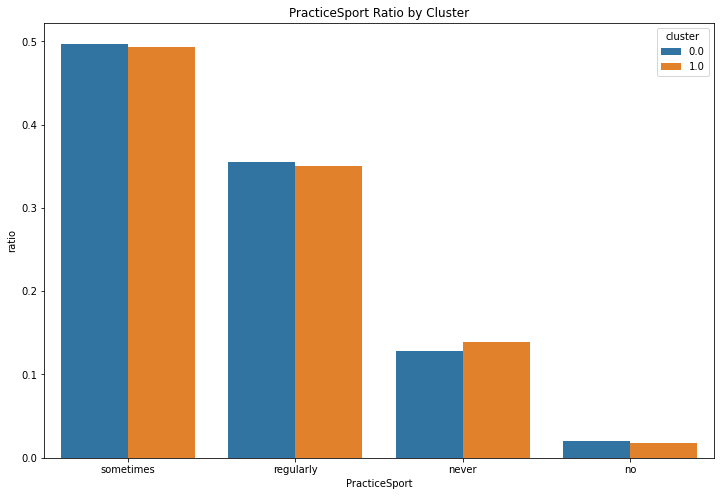

In [81]:
#PracticeSport
cluster_PracticeSport_ratio = stu.groupby(['cluster', 'PracticeSport']).size().reset_index(name='count')
cluster_ratio = cluster_PracticeSport_ratio.groupby('cluster')['count'].transform(lambda x: x / x.sum())
cluster_PracticeSport_ratio['ratio'] = cluster_ratio

# plot 생성
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=cluster_PracticeSport_ratio, x='PracticeSport', y='ratio', hue='cluster', order=['sometimes','regularly','never','no'])
ax.set(title='PracticeSport Ratio by Cluster')
plt.show()